# Image classification using LSTM by `Mr. Harshit Dawar!`

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input, GRU, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap as HM

## Importing the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
# Normalizing the Dataset
x_train, x_test = x_train / 255, x_test / 255

## Building the Model

In [6]:
x_train[0].shape

(28, 28)

In [12]:
inputShape = Input(shape = (x_train[0].shape), )
LayerStack = LSTM(128)(inputShape)
LayerStack = Dense(10, activation = "softmax")(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [13]:
LSTMModel.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = "adam",
                  metrics = ["accuracy"])

TrainedModel = LSTMModel.fit(x_train,
                             y_train,
                             epochs = 15,
                             validation_data = (x_test, y_test)
                            )

Epoch 1/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3231 - accuracy: 0.8960 - val_loss: 0.1237 - val_accuracy: 0.9621
Epoch 2/15
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1021 - accuracy: 0.9694 - val_loss: 0.0708 - val_accuracy: 0.9799
Epoch 3/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0698 - accuracy: 0.9785 - val_loss: 0.0623 - val_accuracy: 0.9802
Epoch 4/15
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.0630 - val_accuracy: 0.9822
Epoch 5/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0442 - accuracy: 0.9870 - val_loss: 0.0532 - val_accuracy: 0.9831
Epoch 6/15
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0537 - val_accuracy: 0.9831
Epoch 7/15
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0429 -

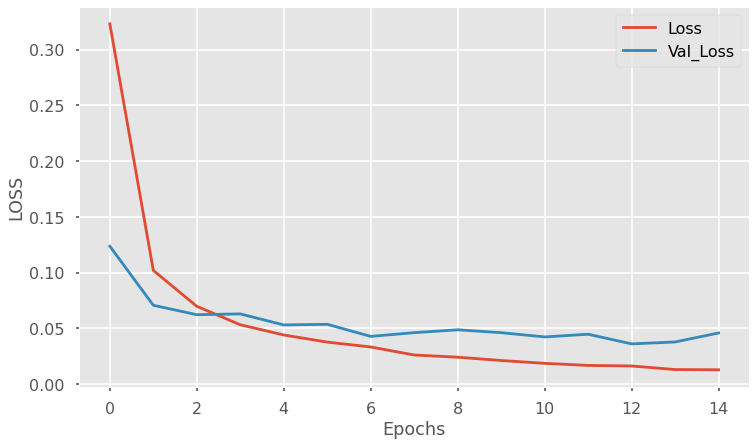

In [15]:
plt.style.use("seaborn-poster")
plt.figure(figsize = (12, 7))
plt.plot(TrainedModel.history["loss"], label = "Loss")
plt.plot(TrainedModel.history["val_loss"], label = "Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

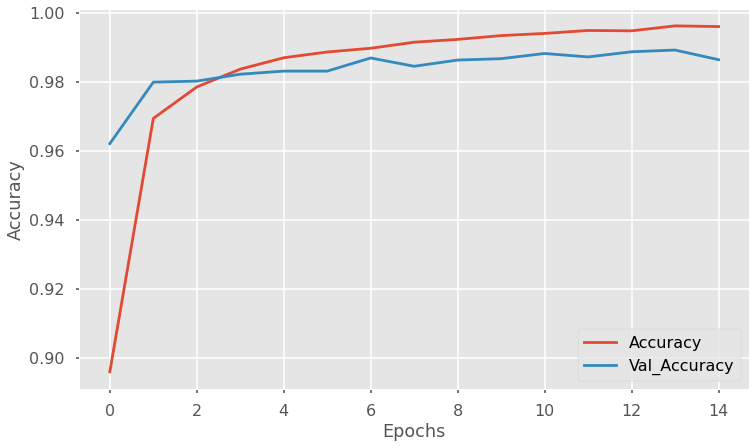

In [16]:
plt.style.use("seaborn-poster")
plt.figure(figsize = (12, 7))
plt.plot(TrainedModel.history["accuracy"], label = "Accuracy")
plt.plot(TrainedModel.history["val_accuracy"], label = "Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
# Taking the maximum output column wise & also to get the class label, because LSTM predicts a number
# & to get the max number from there argmax function is used & axis = 1 means column
predictedLabels = LSTMModel.predict(x_test).argmax(axis = 1)

In [21]:
predictedLabels

array([7, 2, 1, ..., 4, 5, 6])

In [75]:
print(classification_report(y_test, predictedLabels))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



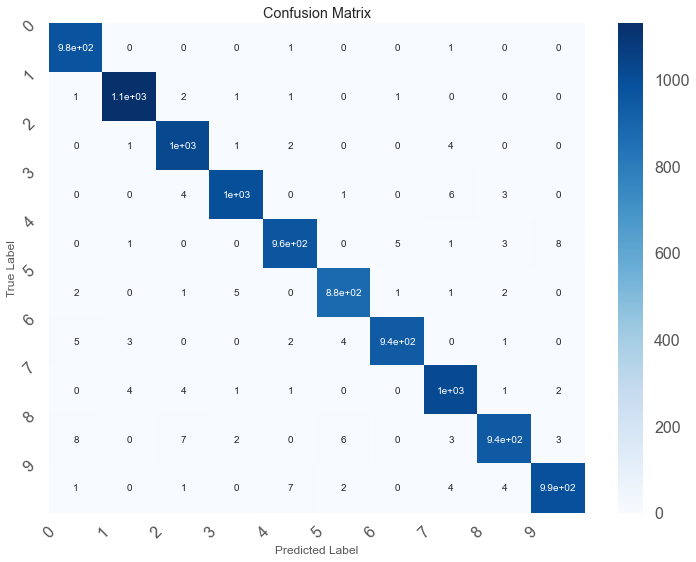

In [68]:
plt.figure(figsize = (12, 9))
HM(confusion_matrix(y_test, predictedLabels), annot = True, cmap = "Blues")
plt.xticks(range(10), range(10), rotation = 45)
plt.yticks(range(10), range(10), rotation = 45)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

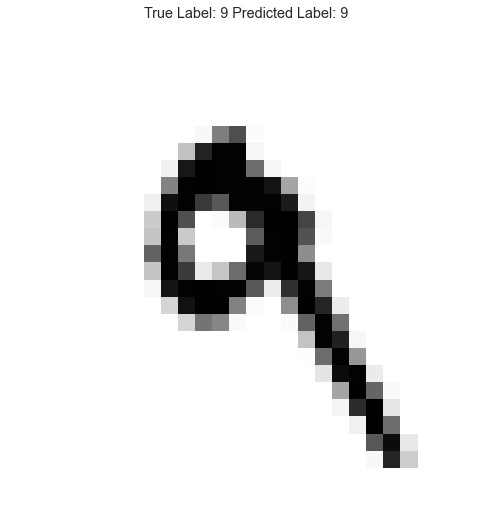

In [74]:
plt.imshow(x_test[7])
plt.title("True Label: {} Predicted Label: {}".format(y_test[7], predictedLabels[7]))
plt.axis("off")
plt.show()